# Exercise 1.1: Load Curves and Capacity Factor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     Time     MW
0   12:00  10821
1   13:00  10412
2   14:00  10217
3   15:00  10277
4   16:00  10548
5   17:00  11341
6   18:00  12974
7   19:00  14577
8   20:00  15575
9   21:00  15868
10  22:00  16540
11  23:00  16205
12   0:00  16284
13   1:00  16206
14   2:00  15795
15   3:00  15640
16   4:00  15432
17   5:00  15232
18   6:00  15390
19   7:00  15382
20   8:00  15120
21   9:00  14832
22  10:00  14219
23  11:00  13110


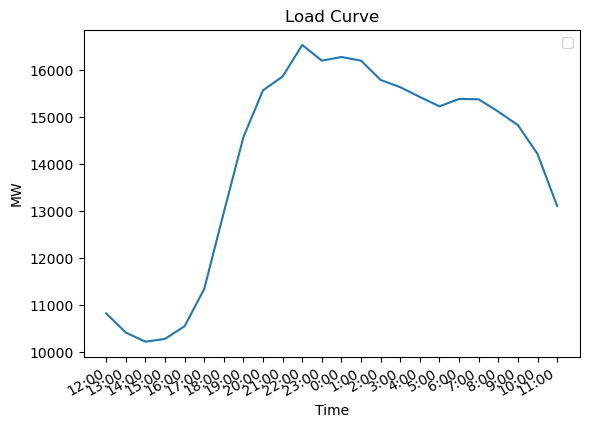

In [1]:
# Load Curve

# LOAD CURVE
import csv
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Time": [],
    "MW": []
}

with open("Bday.csv","r") as file:
    coordinates = csv.reader(file)
    next(coordinates)
    for row in coordinates:
        data["Time"].append(row[1])
        data["MW"].append(int(row[2]))

data_df = pd.DataFrame(data)
print(data_df)
fig = plt.figure()
plt.plot(data["Time"],data["MW"])
fig.autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("MW")
plt.title("Load Curve")
plt.legend()
plt.show()

     Time     MW  MW_SORTED  Interval  Duration
0   12:00  10821      16540         1         1
1   13:00  10412      16284         1         2
2   14:00  10217      16206         1         3
3   15:00  10277      16205         1         4
4   16:00  10548      15868         1         5
5   17:00  11341      15795         1         6
6   18:00  12974      15640         1         7
7   19:00  14577      15575         1         8
8   20:00  15575      15432         1         9
9   21:00  15868      15390         1        10
10  22:00  16540      15382         1        11
11  23:00  16205      15232         1        12
12   0:00  16284      15120         1        13
13   1:00  16206      14832         1        14
14   2:00  15795      14577         1        15
15   3:00  15640      14219         1        16
16   4:00  15432      13110         1        17
17   5:00  15232      12974         1        18
18   6:00  15390      11341         1        19
19   7:00  15382      10821         1   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


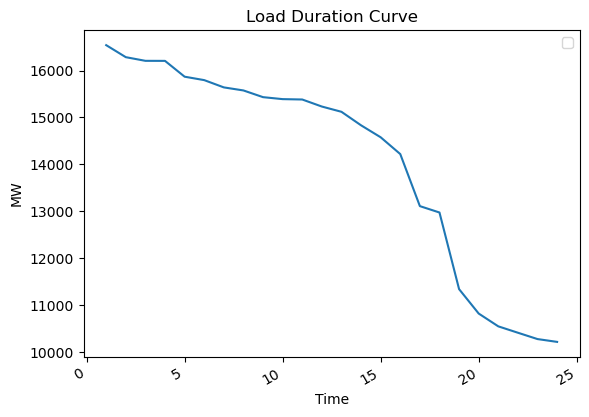

In [1]:
# LOAD DURATION CURVE
import csv
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Time": [],
    "MW": []
}

with open("Bday.csv","r") as file:
    coordinates = csv.reader(file)
    next(coordinates)
    for row in coordinates:
        data["Time"].append(row[1])
        data["MW"].append(int(row[2]))

data_df = pd.DataFrame(data)
MW = data["MW"]
MW_std = sorted(MW, reverse=True)
data_df["MW_SORTED"] = MW_std
data_df["Interval"] = 1
data_df["Duration"] = data_df["Interval"].cumsum()
print(data_df)
fig = plt.figure()
plt.plot(data_df["Duration"],data_df["MW_SORTED"])
fig.autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("MW")
plt.title("Load Duration Curve")
plt.legend()
plt.show()

In [18]:
# Capacity Factor

import csv
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Time": [],
    "MW": []
}

with open("Bday.csv","r") as file:
    coordinates = csv.reader(file)
    next(coordinates)
    for row in coordinates:
        data["Time"].append(row[1])
        data["MW"].append(int(row[2]))

data_df = pd.DataFrame(data)
MW = data["MW"]
MW_std = sorted(MW, reverse=True)
data_df["MW_SORTED"] = MW_std
data_df["Interval"] = 1
data_df["Duration"] = data_df["Interval"].cumsum()
print(data_df)

actual_energy = 0
for i in range(23):
   #actual_energy += 0.5*(MW_std[i] + MW_std[i+1])
    actual_energy += 0.5*(data_df.MW_SORTED[i]+data_df.MW_SORTED[i+1])

print(f"Actual energy Consumption: {actual_energy}")
#print(f"Max MWh consumption in 24h period: {max(MW_std)}")
print(f"Max MWh consumption in 24h period: {max(data_df.MW_SORTED)}")
max_energy = max(data_df.MW_SORTED)*24
print(f"Maximum Energy (MWh): {max_energy}")
print(f"Capacity Factor: {(actual_energy/max_energy):0.2f}")

     Time     MW  MW_SORTED  Interval  Duration
0   12:00  10821      16540         1         1
1   13:00  10412      16284         1         2
2   14:00  10217      16206         1         3
3   15:00  10277      16205         1         4
4   16:00  10548      15868         1         5
5   17:00  11341      15795         1         6
6   18:00  12974      15640         1         7
7   19:00  14577      15575         1         8
8   20:00  15575      15432         1         9
9   21:00  15868      15390         1        10
10  22:00  16540      15382         1        11
11  23:00  16205      15232         1        12
12   0:00  16284      15120         1        13
13   1:00  16206      14832         1        14
14   2:00  15795      14577         1        15
15   3:00  15640      14219         1        16
16   4:00  15432      13110         1        17
17   5:00  15232      12974         1        18
18   6:00  15390      11341         1        19
19   7:00  15382      10821         1   